In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
%%time
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100
480/480 [==============================] - 1s 2ms/step - loss: 0.2546 - accuracy: 0.9054 - val_loss: 0.2860 - val_accuracy: 0.8916
Epoch 2/100
480/480 [==============================] - 1s 2ms/step - loss: 0.2384 - accuracy: 0.9111 - val_loss: 0.2489 - val_accuracy: 0.9067
Epoch 3/100
480/480 [==============================] - 1s 2ms/step - loss: 0.2286 - accuracy: 0.9159 - val_loss: 0.2527 - val_accuracy: 0.9054
Epoch 4/100
480/480 [==============================] - 1s 2ms/step - loss: 0.2193 - accuracy: 0.9195 - val_loss: 0.2485 - val_accuracy: 0.9069
Epoch 5/100
480/480 [==============================] - 1s 2ms/step - loss: 0.2119 - accuracy: 0.9206 - val_loss: 0.2648 - val_accuracy: 0.9019
Epoch 6/100
480/480 [==============================] - 1s 2ms/step - loss: 0.2066 - accuracy: 0.9230 - val_loss: 0.2601 - val_accuracy: 0.9035
Epoch 7/100
480/480 [==============================] - 1s 2ms/step - loss: 0.1976 - accuracy: 0.9265 - val_loss: 0.2797 - val_accuracy: 0.8995

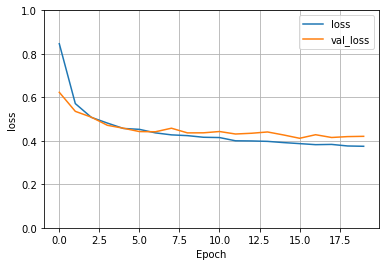

In [47]:
import matplotlib.pyplot as plt

def plot_history(history, value: str = 'loss', limit = None):
    
    if limit:
        if isinstance(limit, int):
            limit_low = None
            limit_high = limit
        elif len(limit) > 1:
            limit_low, limit_high = limit
    else:
        limit_low = None
        limit_high = None

    plt.plot(history.history[value][limit_low:limit_high], label='loss')
    plt.plot(history.history[f'val_{value}'][limit_low:limit_high], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel(value)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history)

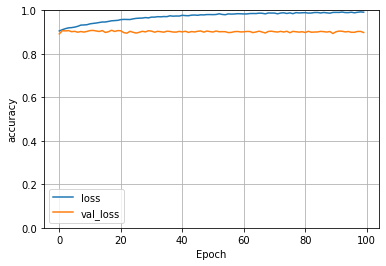

In [43]:
plot_history(history, 'accuracy')

In [44]:
model_l2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_l2.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
%%time
history_l2 = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=0)

CPU times: user 4min 31s, sys: 1min 21s, total: 5min 52s
Wall time: 1min 40s


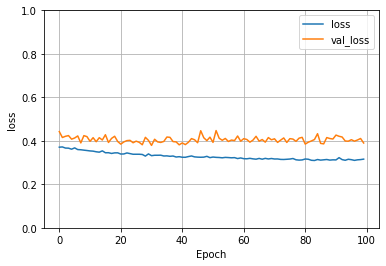

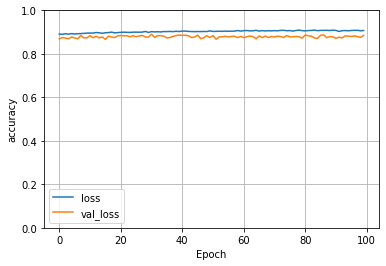

In [50]:
plot_history(history_l2)
plot_history(history_l2, 'accuracy')

In [51]:
model_dr = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_dr.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
%%time
history_dr = model_dr.fit(x_train, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=0)

CPU times: user 4min 1s, sys: 53.5 s, total: 4min 54s
Wall time: 1min 30s


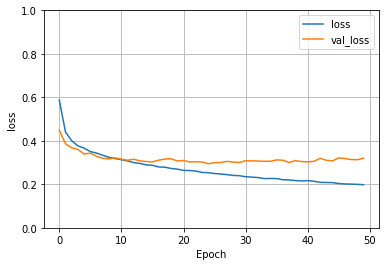

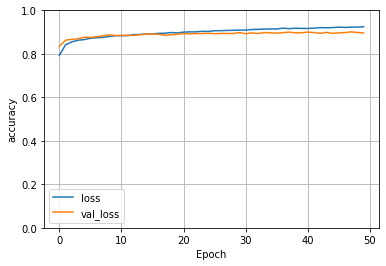

In [57]:
plot_history(history_dr, limit=50)
plot_history(history_dr, 'accuracy', limit=50)

In [62]:
model_c = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_c.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
%%time
history_c = model_c.fit(x_train, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=0)

CPU times: user 2min 23s, sys: 48.4 s, total: 3min 12s
Wall time: 55.4 s


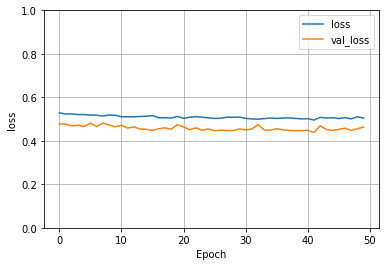

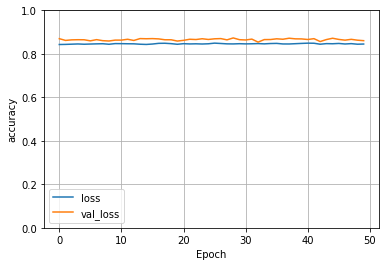

In [66]:
plot_history(history_c, limit=50)
plot_history(history_c, 'accuracy', limit=50)

In [60]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.89):
            print("\nReached 89% accuracy on val set so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()